In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
## Loading The Data

In [3]:
df = pd.read_csv('comments.csv')

In [4]:
df.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [5]:
df.tail()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
18404,18404,cyLWtMSry58,I really like the point about engineering tool...,0.0,2.0
18405,18405,cyLWtMSry58,I’ve just started exploring this field. And th...,20.0,2.0
18406,18406,cyLWtMSry58,Excelente video con una pregunta filosófica pr...,1.0,1.0
18407,18407,cyLWtMSry58,"Hey Daniel, just discovered your channel a cou...",35.0,2.0
18408,18408,cyLWtMSry58,This is great. Focus is key. A playful approac...,0.0,2.0


In [6]:
df.shape

(18409, 5)

In [7]:
## Data Cleaning and EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18409 non-null  int64  
 1   Video ID    18409 non-null  object 
 2   Comment     18408 non-null  object 
 3   Likes       18409 non-null  float64
 4   Sentiment   18409 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 719.2+ KB


In [9]:
df.columns

Index(['Unnamed: 0', 'Video ID', 'Comment', 'Likes', 'Sentiment'], dtype='object')

In [10]:
df.drop(['Unnamed: 0', 'Video ID', 'Likes'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

Comment      1
Sentiment    0
dtype: int64

In [12]:
df.dropna(subset='Comment', inplace=True)

In [13]:
df.duplicated().sum()

414

In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17994 entries, 0 to 18408
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Comment    17994 non-null  object 
 1   Sentiment  17994 non-null  float64
dtypes: float64(1), object(1)
memory usage: 421.7+ KB


In [16]:
df['Sentiment'].value_counts()

Sentiment
2.0    11141
1.0     4532
0.0     2321
Name: count, dtype: int64

In [25]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install nltk

In [28]:
pip install gensim

  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/06/4d/8d2dd5d81afdea2aa790860d5c7e12f80154923ba827e3fa36759f0bf2cd/FuzzyTM-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/0f/81/8f35156b9af9c9585de8518b354e42bcaf3ee3e5a77e530613c37de22b1e/pyFUME-0.2.25-py3-none-any.whl.metadata
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/8d/93/8448d3f1aa9d2911b8cba2602aaa1af85eb31a26d28b7b737f1fa5b40c02/simpful-2.11.1-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/67.1

In [29]:
pip install pyldavis

  Obtaining dependency information for pyldavis from https://files.pythonhosted.org/packages/6b/5a/66364c6799f2362bfb9b7100bc1ce6ffcdfe7f17e8d2e85a591bfe427643/pyLDAvis-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for funcy from https://files.pythonhosted.org/packages/d5/08/c2409cb01d5368dcfedcbaffa7d044cc8957d57a9d0855244a5eb4709d30/funcy-2.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.

In [30]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 196.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 196.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 196.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 196.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 196.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 196.9 kB/s eta 0:00:02
   ----- ------------

In [31]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   ----- --------------------------------- 81.9/626.3 kB 286.7 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/626.3 kB 286.7 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/626.3 kB 286.7 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/626.3 kB 286.7 kB/s eta 0:00:02
   ----- --------------------------------

In [32]:
pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd

In [33]:
pip install textstat

     ---------------------------------------- 0.0/105.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/105.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/105.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/105.1 kB ? eta -:--:--
     --------------------- --------------- 61.4/105.1 kB 326.1 kB/s eta 0:00:01
     --------------------- --------------- 61.4/105.1 kB 326.1 kB/s eta 0:00:01
     -------------------------------- ---- 92.2/105.1 kB 308.0 kB/s eta 0:00:01
     ------------------------------------ 105.1/105.1 kB 319.5 kB/s eta 0:00:00
  Obtaining dependency information for pyphen from https://files.pythonhosted.org/packages/e3/c3/556e4ed0402ad7810a828532d539f1b14884fc0ff6c2da8ab401bf3bbd63/pyphen-0.14.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.0 MB 4.8 MB/s eta 0:00:01
   - -------------------------------------

In [17]:
##Visualization 

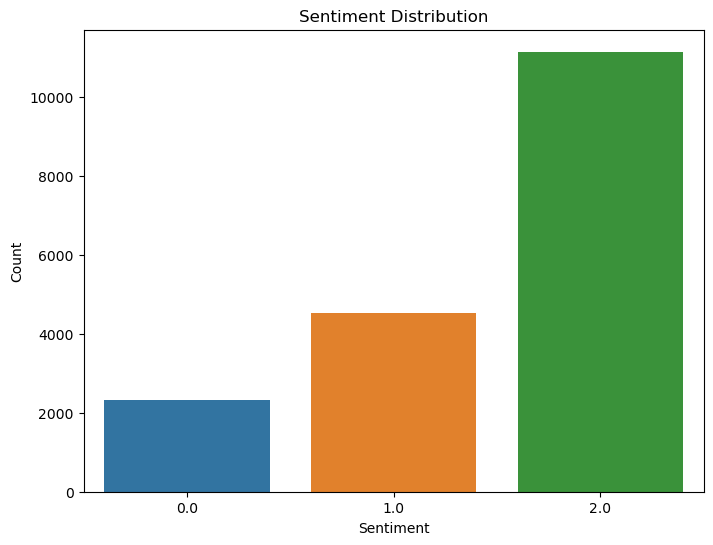

In [40]:
# Visualize Sentiment distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()




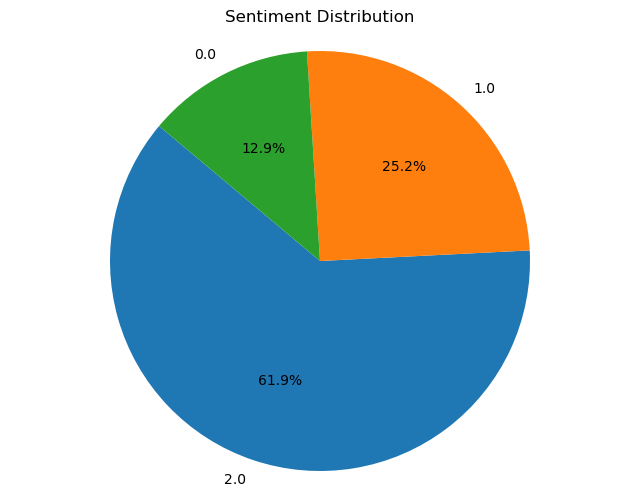

In [41]:
# Create a pie chart for Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

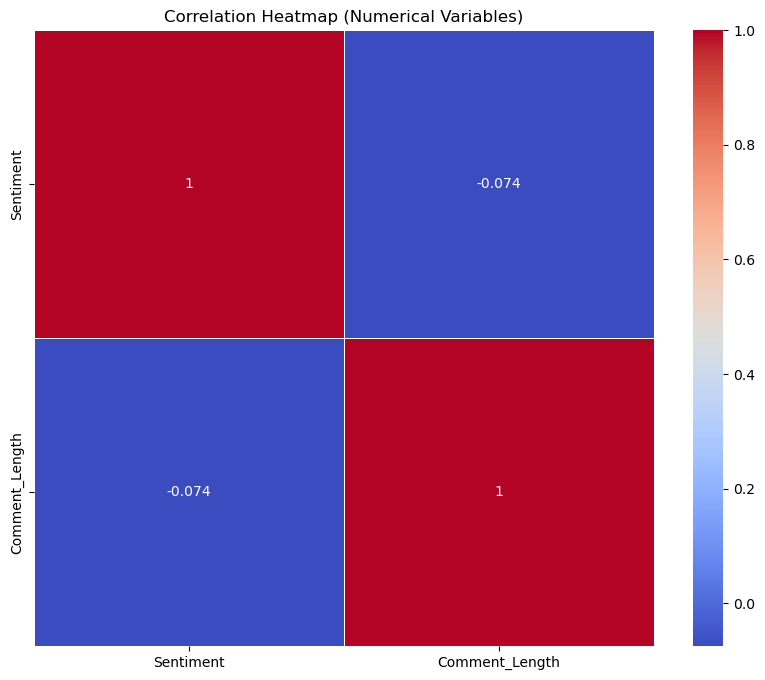

In [45]:
# Selecting only numerical columns for correlation heatmap
numerical_df = df.select_dtypes(include=np.number)

# Create a heatmap to visualize correlation between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()


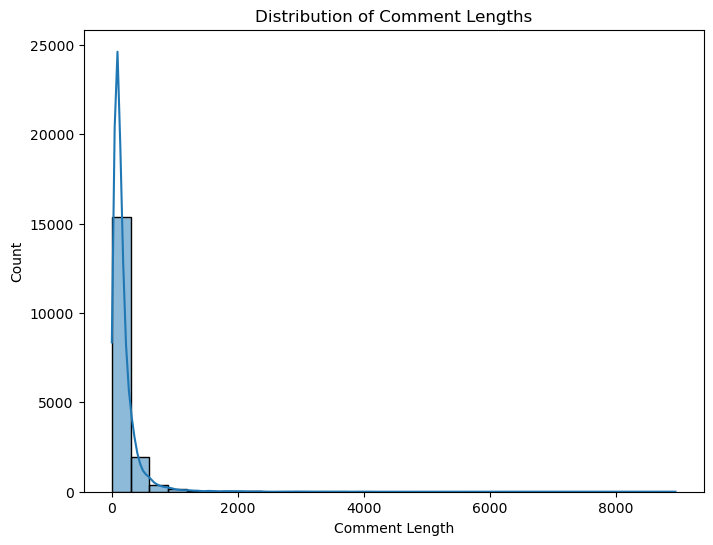

In [43]:
# Histogram of comment lengths
df['Comment_Length'] = df['Comment'].apply(lambda x: len(x))
plt.figure(figsize=(8, 6))
sns.histplot(df['Comment_Length'], bins=30, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Count')
plt.show()

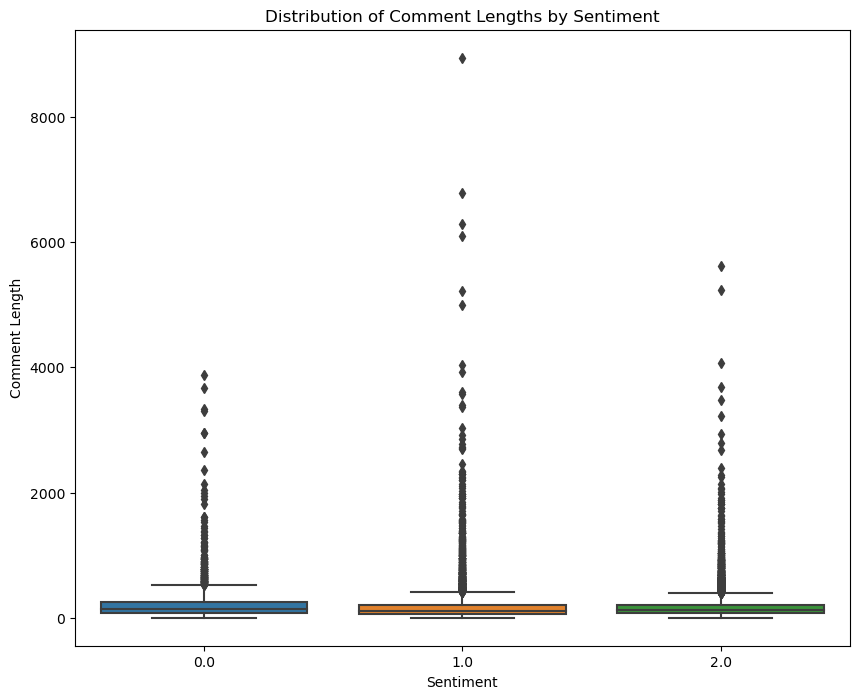

In [44]:
# Example of Box plot to visualize distribution of comment lengths by Sentiment
plt.figure(figsize=(10, 8))
sns.boxplot(x='Sentiment', y='Comment_Length', data=df)
plt.title('Distribution of Comment Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length')
plt.show()

##### The provided code conducts exploratory data analysis (EDA) on a comments dataset. Initially, it loads the data and preprocesses it by removing unnecessary columns, dropping rows with missing values in the 'Comment' column, and eliminating duplicates. It then visualizes the sentiment distribution using both a bar plot and a pie chart. A heatmap is generated to illustrate correlations between numerical variables, aiding in identifying relationships. Additional visualizations include a histogram portraying the distribution of comment lengths and a box plot illustrating comment length variations across sentiment categories. These analyses collectively offer insights into sentiment distribution, comment length distribution, and variable correlations within the dataset.